In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

# Category as a predictive attribute

In [2]:
usData = pd.read_csv('../Data/YouTube/cleaned_us.csv')
usData['trending_date'] = '20' + usData['trending_date']
usData['trending_date'] = pd.to_datetime(usData['trending_date'],format='%Y.%d.%m')

In [3]:
usData.head(5)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


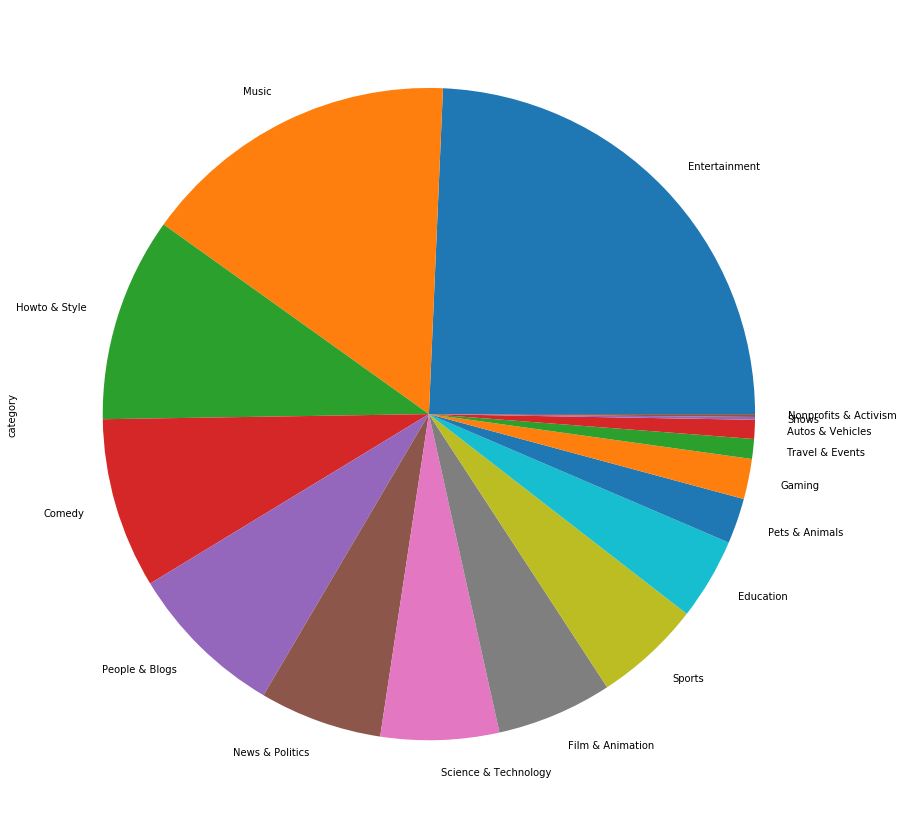

In [13]:
usData['category'].value_counts().plot.pie(figsize=(20,15))

### Categories vs. Views

In [ ]:
usData.sort_values('category').plot.line(x='category',y='views')

In [ ]:
#From the plot above we can see that there are clearly categories that generally produce trending videos with more views

In [ ]:
usData.sort_values('views', ascending=False).head(10)['category']

In [ ]:
# We can see that for the trending videos with the most views - the top 10 come from The music category
# This would likely be because music videos are likley to be watch more than once and other videos like blogs will probably only
# be viewed once.

In [ ]:
ax = usData.groupby('category')['views'].mean().sort_values(ascending=False).plot.bar()
ax.set_title("Category VS. Views")
plt.show()

In [ ]:
#We can see here from a graph of the average video views that the music category still dominates the types of videos in trending

### Categories vs. comments

In [ ]:
usData.sort_values('category').plot.line(x='category',y='comment_count')

In [ ]:
# looking at the categories vs. comment count we can see that several types of videos get more comments than others

In [ ]:
usData.sort_values('comment_count', ascending=False).head(10)[['category','comment_count']]

In [ ]:
# the top 4 videos with comments are all enternainment videos, with then music folling closely behind

In [ ]:
ax = usData.groupby('category')['comment_count'].mean().sort_values(ascending=False).plot.bar()
ax.set_title("Category VS. Comment Count")
plt.show()

In [ ]:
# A different stroy can be seen if we look at the average number of comments on trending videos of a certain category. The
# Nonprofit and activism category has the most average comments while the entertainment section drops down to 6th place.

# This is insteresting as it tells a very different story than the categories vs. views the veiws are more consistent per
# category, but the comments seem to vary

### Most trending videos by category over time

In [ ]:
usData['trending_month'] = pd.DatetimeIndex(usData['trending_date']).month

In [ ]:
usData['trending_year'] = pd.DatetimeIndex(usData['trending_date']).year

In [ ]:
plt.figure(figsize=(12, 6))
usData.groupby(['trending_year','trending_month'])['category'].value_counts()[2018].plot.bar()

### Decision tree to predict what category a video is in

In [ ]:
usData['category'].astype('category')
usData.head(1)

In [ ]:
attributes = usData[['views','likes','dislikes','comment_count']]
target = usData['category'].astype('category')

In [ ]:
usData['category'].value_counts().index

In [ ]:
usData['category'].value_counts()

In [ ]:
Tree = tree.DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
TreeCV = GridSearchCV(Tree,param_grid=parameters, return_train_score=True)
TreeCV.fit(attributes,target)
TreeCV.best_params_

In [ ]:
Tree = tree.DecisionTreeClassifier(max_depth=7)
Tree.fit(attributes,target)
# display the tree
dot_data = tree.export_graphviz(Tree,
                              out_file=None,
                              feature_names=attributes.columns,
                              class_names=usData['category'].value_counts().index,
                              proportion=True,
                              impurity=False,
                              filled=True,
                              rounded=True)
graph = graphviz.Source(dot_data)
graph.render('CatgegoryOFTrendingVideo')
graph

In [ ]:
#Jimmy Fallon - Comedy
test = pd.DataFrame()
test['views'] = [3224141]
test['likes'] = [98805]
test['dislikes'] = [3560]
test['comment_count'] = [2455]
Tree.predict(test)

In [ ]:
#Star Wars the clone wars trailer - Entertainment
test = pd.DataFrame()
test['views'] = [3586334]
test['likes'] = [221592]
test['dislikes'] = [3256]
test['comment_count'] = [8032]
Tree.predict(test)

In [ ]:
#GMM - Entertainment
test = pd.DataFrame()
test['views'] = [152912]
test['likes'] = [6649]
test['dislikes'] = [108]
test['comment_count'] = [454]
Tree.predict(test)

In [ ]:
#U.S. Senate Impeachment Trial - News and politics
test = pd.DataFrame()
test['views'] = [425679]
test['likes'] = [4253]
test['dislikes'] = [1389]
test['comment_count'] = [967]
Tree.predict(test)

In [ ]:
(1 - Tree.score(attributes,target)).round(2)

### Naive Bayes classifier to predict category of video

In [ ]:
NBayes = MultinomialNB()
NBayes.fit(attributes,target)
(1 - NBayes.score(attributes,target)).round(2)

In [ ]:
#not very good predictions from either a decision tree or from using naive bayes classifiers.

In [ ]:
labels = target.cat.categories
predict = NBayes.predict(attributes)
ConfMat = confusion_matrix(target,predict)
ConfMat = pd.DataFrame(ConfMat,index=labels,columns=labels)
ConfMat

In [ ]:
# from the confusion matrix seen here you can see that the number of views,likes,and dislikes does nto likely give a very good
# insight into what category a video is. This is suggests that videos that trend can really come from anywhere as the 
# decision tree and naive bayes classifier gave very high error rates.

### K-Means clustering of categories

In [ ]:
usData['category'].value_counts()

In [ ]:
km = KMeans(n_clusters=16,n_init=300)
km.fit(attributes)

In [ ]:
lables = km.predict(attributes)
lables

#### Views vs. Likes

In [ ]:
#k-means clustering 
df = pd.DataFrame()
color = np.array(['blue','green','yellow','red','orange',
                  'purple','cyan','brown','pink','black',
                  'tan','gray','fuchsia','lime','azure','teal'])
df['kmeans'] = color[lables]
usData.plot.scatter(x='views',y='likes',c=df.kmeans, s=100,alpha=0.5,figsize=(15,10))

In [ ]:
# scatter plot of actual categories
usData['category'] = usData['category'].astype('category')
df['categories'] = color[usData.category.cat.codes.values]
usData.plot.scatter(x='views',y='likes',c=df.categories, s=100,alpha=0.5,figsize=(15,10))

In [ ]:
#standardize the attributes for a k-means plot
attributes=(attributes-attributes.mean())/attributes.std()
km = KMeans(n_clusters=16,n_init=300)
km.fit(attributes)
lables = km.predict(attributes)
lables

In [ ]:
df = pd.DataFrame()
color = np.array(['blue','green','yellow','red','orange',
                  'purple','cyan','brown','pink','black',
                  'tan','gray','fuchsia','lime','azure','teal'])
df['kmeans'] = color[lables]
usData.plot.scatter(x='views',y='likes',c=df.kmeans, s=100,alpha=0.5,figsize=(15,10))

In [ ]:
usData['category'] = usData['category'].astype('category')
df['categories'] = color[usData.category.cat.codes.values]
usData.plot.scatter(x='views',y='likes',c=df.categories, s=100,alpha=0.5,figsize=(15,10))

In [ ]:

# from the clustering on the data sets we can see that there is not great clustering for the data points around the categories

# there does appear to be some correlation in the groupings but some are actual 1 larger cluster and so there woulkd be
# many missed predictions.

#### Likes vs. Dislikes

In [ ]:
# standardized attributes k-means scatter plot of likes vs dislikes
df = pd.DataFrame()
color = np.array(['blue','green','yellow','red','orange',
                  'purple','cyan','brown','pink','black',
                  'tan','gray','fuchsia','lime','azure','teal'])
df['kmeans'] = color[lables]
usData.plot.scatter(x='likes',y='dislikes',c=df.kmeans, s=100,alpha=0.5,figsize=(15,10))

In [ ]:
# actual categories likes vs dislikes
usData['category'] = usData['category'].astype('category')
df['categories'] = color[usData.category.cat.codes.values]
usData.plot.scatter(x='likes',y='dislikes',c=df.categories, s=100,alpha=0.5,figsize=(15,10))

In [ ]:
# we can see the same type of misprediction here in this scatter plot for likes vs. dislikes. There are some categories made
# that actually contain mostly another categories videos

# Video Title Length

## US

In [ ]:
VideoTitleLengthUS = pd.DataFrame()
#VideoTitleLength['title'] = usData['title']
VideoTitleLengthUS['views'] = usData['views']
VideoTitleLengthUS['length'] = usData['title'].str.len()
VideoTitleLengthUS.head(3)

In [ ]:
VideoTitleLengthUS.sort_values('length').plot.line(x='length',y='views')

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.regplot(x="length", y="views", data=VideoTitleLengthUS, x_estimator=np.mean, logx=True, truncate=True)
ax.set_title('US')
plt.show()

In [ ]:
# we can see from the above regression curve that the lenght of the video title does not tend to affect the views, although
# there is a slight uptick in the number of views with short video titles.

# this could suggest that if people can see the information about a video in a short glance they may be more likely to watch
# which would help the video to trend.

## Great Britain

In [ ]:
gbData = pd.read_csv('../Data/YouTube/cleaned_gb.csv')
gbData.head(3)

In [ ]:
VideoTitleLengthGB = pd.DataFrame()
VideoTitleLengthGB['views'] = gbData['views']
VideoTitleLengthGB['length'] = gbData['title'].str.len()
VideoTitleLengthGB.head(3)

In [ ]:
VideoTitleLengthGB.sort_values('length').plot.line(x='length',y='views')

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.regplot(x="length", y="views", data=VideoTitleLengthGB, x_estimator=np.mean, logx=True, truncate=True)
ax.set_title('GB')
plt.show()

In [ ]:
# similar to the US data that we took a look at the length of the title does not greatly affect the number of views a trending
# video gets, however there is a slight increase the shorter the title